In [1]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
# root directory containing the images folder and the csb with file names and captions.
root_dir = "../data/flickr30k_images"
images_dir = os.path.join(root_dir, "flickr30k_images")

In [3]:
df = pd.read_csv(os.path.join(root_dir, "results.csv"), sep="|")
df.shape

(158915, 3)

In [4]:
df.head(15)

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


So, we have 158915 rows and 5 captions per image, which means 158915/5 = 31783 images.

In [5]:
df.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

In [6]:
# Let us rename the columnbs of the dataframe
df.columns = ["image_name", "comment_number", "comment"]
df["comment_number"] = df["comment_number"].str.lstrip()
df["comment"] = df["comment"].str.lstrip()

For sanity check let us plot two images at random and also seee whether all the images which are in iamge_name are present in the folder containing the images

In [7]:
def plot_image(image_path, caption):
    """Plots an image from the dataset"""
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.show()
    print(caption)
    print(f"The shape of the image is {np.array(image).shape}")

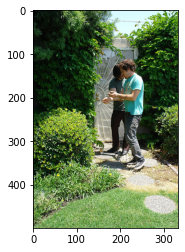

Two young guys with shaggy hair look at their hands while hanging out in the yard .
The shape of the image is (500, 333, 3)


In [9]:
index = 0
plot_image(os.path.join(images_dir, df.iloc[index]["image_name"]), df.iloc[index]["comment"])

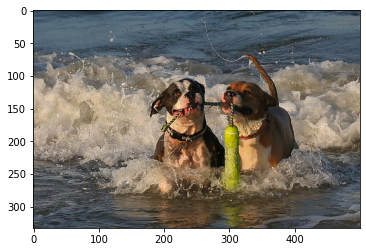

A brown and white and a black and white dog hauling in a floating toy from the ocean .
The shape of the image is (333, 500, 3)


In [10]:
index = 2000
plot_image(os.path.join(images_dir, df.iloc[index]["image_name"]), df.iloc[index]["comment"])

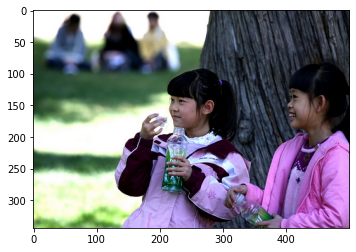

Two girls in pink coats drink from soda bottles and lean on a tree .
The shape of the image is (344, 500, 3)


In [11]:
index = 78000
plot_image(os.path.join(images_dir, df.iloc[index]["image_name"]), df.iloc[index]["comment"])

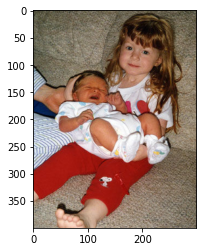

A young girl in red Snoopy pants is holding a very small baby on her lap .
The shape of the image is (400, 300, 3)


In [12]:
# If want to search for a specific image from the folder
plot_image(os.path.join(images_dir, "2656351.jpg"), df[df["image_name"] == "2656351.jpg"]["comment"].values[0])

So, we notice that the images have different heights and widths and have 3 channels

Now let us see if all the files in the given dataframes are available

In [13]:
for filename in df["image_name"].values:
    if not os.path.exists(os.path.join(images_dir, filename)):
        print(filename)

So, all of the images exist